# Projet SER

In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import kaggle
import keras
import pickle
from keras.models import load_model

from IPython.display import Audio
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# List of feature names
feature_names = [
    'ZCR', 'Energy', 'SpectralCentroid', 'SpectralSpread', 'SpectralFlux',
    'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7',
    'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13',
    'Chroma1', 'Chroma2', 'Chroma3', 'Chroma4', 'Chroma5', 'Chroma6',
    'Chroma7', 'Chroma8', 'Chroma9', 'Chroma10', 'Chroma11', 'Chroma12'
]


### Get features

#### Features without data augmentation

no_augm == no data augmentation

In [3]:
df_features_no_augm = pd.read_parquet('data/datasets/features_without_data_augmentation.parquet')

In [4]:
df_features_no_augm.shape

(11682, 31)

In [5]:
df_features_no_augm.head()

,ZCR,Energy,SpectralCentroid,SpectralSpread,SpectralFlux,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Chroma4,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,Chroma10,Chroma11,Chroma12,labels
0,0.204540,0.018793,3157.236579,2216.501199,2.351883,-440.286591,52.299297,-6.665863,4.278304,-15.808314,...,0.321975,0.346781,0.480067,0.331558,0.274953,0.354453,0.393035,0.393787,0.369280,angry
1,0.189815,0.012744,2744.419931,1984.251392,1.925617,-484.020691,52.436253,-8.613789,6.417563,-3.227553,...,0.285417,0.207637,0.242176,0.227869,0.242703,0.299185,0.388764,0.382405,0.378763,fear
2,0.200589,0.061085,3130.434636,2301.913172,2.341648,-315.505432,27.667685,-38.753201,0.213876,-14.901350,...,0.237158,0.168251,0.235008,0.320012,0.395711,0.443678,0.420142,0.433307,0.439407,fear
3,0.177156,0.040083,2874.637946,2220.399237,2.429970,-346.149780,52.521111,-14.139482,6.766320,-16.968788,...,0.367692,0.330350,0.368875,0.278672,0.218055,0.257016,0.376277,0.342528,0.312693,angry
4,0.175203,0.006512,2897.465696,2159.335761,2.339541,-532.369385,70.741547,-1.425078,11.303340,-9.632647,...,0.345111,0.322321,0.372758,0.350202,0.387294,0.438436,0.350818,0.331767,0.371133,disgust


#### Features with data augmentation
with_augm == with data augmentation

In [6]:
df_features_with_augm = pd.read_parquet('data/datasets/features_with_data_augmentation.parquet')

In [7]:
df_features_with_augm.shape

(35046, 31)

In [8]:
df_features_with_augm.head()

,ZCR,Energy,SpectralCentroid,SpectralSpread,SpectralFlux,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Chroma4,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,Chroma10,Chroma11,Chroma12,labels
0,0.204540,0.018793,3157.236579,2216.501199,2.351883,-440.286591,52.299297,-6.665863,4.278304,-15.808314,...,0.321975,0.346781,0.480067,0.331558,0.274953,0.354453,0.393035,0.393787,0.369280,angry
1,0.355532,0.022118,4779.178496,3151.482991,1.258613,-232.722713,13.950570,3.320304,-0.422506,-4.984953,...,0.493244,0.494773,0.545488,0.415705,0.412091,0.510564,0.548447,0.561863,0.527673,angry
2,0.230451,0.008324,3406.733059,2340.013524,1.496660,-491.448151,47.446922,-12.718010,-4.566107,-22.940006,...,0.209843,0.225962,0.267457,0.327613,0.502695,0.313019,0.257691,0.319452,0.360415,angry
3,0.189815,0.012744,2744.419931,1984.251392,1.925617,-484.020691,52.436253,-8.613789,6.417563,-3.227553,...,0.285417,0.207637,0.242176,0.227869,0.242703,0.299185,0.388764,0.382405,0.378763,fear
4,0.326448,0.014248,4586.606062,3168.801230,1.250617,-311.395009,17.698572,8.428658,0.337073,-0.577668,...,0.530345,0.481812,0.458058,0.429658,0.432802,0.442983,0.469787,0.516060,0.554791,fear


### Creation of a column to predict only anger emotion

In [9]:
original_labels = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
target_emotions = ['angry']

In [10]:
# Add a new column 'is_angry' to the dataframe
df_features_no_augm['is_angry'] = np.where(df_features_no_augm['labels'].isin(target_emotions), 1, 0)
df_features_with_augm['is_angry'] = np.where(df_features_with_augm['labels'].isin(target_emotions), 1, 0)

In [11]:
# Check the modified dataframe
df_features_no_augm.head()

,ZCR,Energy,SpectralCentroid,SpectralSpread,SpectralFlux,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,Chroma10,Chroma11,Chroma12,labels,is_angry
0,0.204540,0.018793,3157.236579,2216.501199,2.351883,-440.286591,52.299297,-6.665863,4.278304,-15.808314,...,0.346781,0.480067,0.331558,0.274953,0.354453,0.393035,0.393787,0.369280,angry,1
1,0.189815,0.012744,2744.419931,1984.251392,1.925617,-484.020691,52.436253,-8.613789,6.417563,-3.227553,...,0.207637,0.242176,0.227869,0.242703,0.299185,0.388764,0.382405,0.378763,fear,0
2,0.200589,0.061085,3130.434636,2301.913172,2.341648,-315.505432,27.667685,-38.753201,0.213876,-14.901350,...,0.168251,0.235008,0.320012,0.395711,0.443678,0.420142,0.433307,0.439407,fear,0
3,0.177156,0.040083,2874.637946,2220.399237,2.429970,-346.149780,52.521111,-14.139482,6.766320,-16.968788,...,0.330350,0.368875,0.278672,0.218055,0.257016,0.376277,0.342528,0.312693,angry,1
4,0.175203,0.006512,2897.465696,2159.335761,2.339541,-532.369385,70.741547,-1.425078,11.303340,-9.632647,...,0.322321,0.372758,0.350202,0.387294,0.438436,0.350818,0.331767,0.371133,disgust,0


In [12]:
df_features_with_augm.head()

,ZCR,Energy,SpectralCentroid,SpectralSpread,SpectralFlux,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,Chroma10,Chroma11,Chroma12,labels,is_angry
0,0.204540,0.018793,3157.236579,2216.501199,2.351883,-440.286591,52.299297,-6.665863,4.278304,-15.808314,...,0.346781,0.480067,0.331558,0.274953,0.354453,0.393035,0.393787,0.369280,angry,1
1,0.355532,0.022118,4779.178496,3151.482991,1.258613,-232.722713,13.950570,3.320304,-0.422506,-4.984953,...,0.494773,0.545488,0.415705,0.412091,0.510564,0.548447,0.561863,0.527673,angry,1
2,0.230451,0.008324,3406.733059,2340.013524,1.496660,-491.448151,47.446922,-12.718010,-4.566107,-22.940006,...,0.225962,0.267457,0.327613,0.502695,0.313019,0.257691,0.319452,0.360415,angry,1
3,0.189815,0.012744,2744.419931,1984.251392,1.925617,-484.020691,52.436253,-8.613789,6.417563,-3.227553,...,0.207637,0.242176,0.227869,0.242703,0.299185,0.388764,0.382405,0.378763,fear,0
4,0.326448,0.014248,4586.606062,3168.801230,1.250617,-311.395009,17.698572,8.428658,0.337073,-0.577668,...,0.481812,0.458058,0.429658,0.432802,0.442983,0.469787,0.516060,0.554791,fear,0


### Get X and Y values for each dataset

#### Without data augmentation

In [13]:
X_no_augm = df_features_no_augm.drop(['labels', 'is_angry'], axis=1)
Y_no_augm = df_features_no_augm['is_angry']

In [31]:
X_no_augm.shape

(11682, 30)

In [14]:
Y_no_augm.unique(), Y_no_augm.shape

(array([1, 0]), (11682,))

In [15]:
Y_no_augm = np.array(Y_no_augm)
X_no_augm = np.array(X_no_augm)

In [16]:
X_no_augm.shape, Y_no_augm.shape

((11682, 30), (11682,))

In [17]:
np.min(X_no_augm), np.max(X_no_augm)

(-1131.3707275390625, 4990.732365133476)

#### With data augmentation

In [18]:
X_with_augm = df_features_with_augm.drop(['labels', 'is_angry'], axis=1)
Y_with_augm = df_features_with_augm['is_angry']

In [19]:
Y_with_augm.unique(), Y_with_augm.shape

(array([1, 0]), (35046,))

In [20]:
Y_with_augm = np.array(Y_with_augm)
X_with_augm = np.array(X_with_augm)

In [21]:
X_with_augm.shape, Y_with_augm.shape

((35046, 30), (35046,))

In [22]:
np.min(X_with_augm), np.max(X_with_augm)

(-1131.3709716796875, 5135.884469052664)

#### Data Scaling 

In [24]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# Fit and transform the data
X_no_augm_scaled = scaler.fit_transform(X_no_augm)
X_with_augm_scaled = scaler.fit_transform(X_with_augm)

In [39]:
np.min(X_no_augm_scaled), np.max(X_no_augm_scaled)

(0.0, 1.0000000000000002)

In [40]:
np.min(X_with_augm_scaled), np.max(X_with_augm_scaled)

(0.0, 1.0)

#### Data Split

#### Data without augmentation

In [43]:
# splitting data
X_train_no_augm, X_test_no_augm, y_train_no_augm, y_test_no_augm = train_test_split(X_no_augm_scaled, Y_no_augm, random_state=42, test_size=0.2)
X_train_no_augm.shape, y_train_no_augm.shape, X_test_no_augm.shape, y_test_no_augm.shape

((9345, 30), (9345,), (2337, 30), (2337,))

In [44]:
y_test_no_augm

array([0, 0, 0, ..., 0, 1, 0])

#### Data split with augmentation

In [47]:
# splitting data
X_train_with_augm, X_test_with_augm, y_train_with_augm, y_test_with_augm = train_test_split(X_with_augm_scaled, Y_with_augm, random_state=42, test_size=0.2)
X_train_no_augm.shape, y_train_with_augm.shape, X_test_with_augm.shape, y_test_with_augm.shape

((9345, 30), (28036,), (7010, 30), (7010,))

In [48]:
y_test_with_augm

array([0, 0, 0, ..., 0, 0, 0])

#### Model Training

In [49]:
def cnn_train_model(num_classes, input_features):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_features,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    
    return model


In [50]:
num_classes = 1

In [51]:
# earlystopping and callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=0)

#### Training on data without augmentation

In [52]:
input_features_no_augm = X_train_no_augm.shape[1]

# initializing the cnn model
cnn__binary_model_no_augm = cnn_train_model(num_classes, input_features_no_augm)

In [54]:
num_epochs_no_augm = 30
learning_rate_no_augm = 0.001
batch_size_no_augm = 50
optimizer_no_augm = keras.optimizers.legacy.Adam(learning_rate=learning_rate_no_augm)

In [55]:
# Compile the model
cnn__binary_model_no_augm.compile(optimizer=optimizer_no_augm, loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
cnn__binary_model_no_augm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12801 (50.00 KB)
Trainable params: 12545 (49.00 KB)
Non-trainable params: 256 (1.00 KB)
____________________

In [57]:
# Train the model with callbacks
history_no_augm = cnn__binary_model_no_augm.fit(X_train_no_augm, y_train_no_augm, epochs=num_epochs_no_augm, batch_size=batch_size_no_augm,
                                  validation_split=0.2, verbose=2, callbacks=[early_stopping, model_checkpoint])


Epoch 1/30
150/150 - 1s - loss: 0.4489 - accuracy: 0.7812 - val_loss: 0.4171 - val_accuracy: 0.8379 - 563ms/epoch - 4ms/step
Epoch 2/30
150/150 - 0s - loss: 0.3086 - accuracy: 0.8680 - val_loss: 0.3453 - val_accuracy: 0.8497 - 123ms/epoch - 823us/step
Epoch 3/30


/Users/siakesophie/Local_Docs/ING_3/S9/Engineering_project/project/SERAPP/.env-serapp/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 - 0s - loss: 0.2942 - accuracy: 0.8761 - val_loss: 0.3120 - val_accuracy: 0.8748 - 121ms/epoch - 806us/step
Epoch 4/30
150/150 - 0s - loss: 0.2924 - accuracy: 0.8743 - val_loss: 0.2902 - val_accuracy: 0.8769 - 130ms/epoch - 864us/step
Epoch 5/30
150/150 - 0s - loss: 0.2866 - accuracy: 0.8747 - val_loss: 0.2772 - val_accuracy: 0.8925 - 127ms/epoch - 848us/step
Epoch 6/30
150/150 - 0s - loss: 0.2778 - accuracy: 0.8835 - val_loss: 0.2818 - val_accuracy: 0.8844 - 117ms/epoch - 781us/step
Epoch 7/30
150/150 - 0s - loss: 0.2703 - accuracy: 0.8839 - val_loss: 0.2699 - val_accuracy: 0.8935 - 120ms/epoch - 797us/step
Epoch 8/30
150/150 - 0s - loss: 0.2666 - accuracy: 0.8886 - val_loss: 0.2811 - val_accuracy: 0.8973 - 114ms/epoch - 763us/step
Epoch 9/30
150/150 - 0s - loss: 0.2659 - accuracy: 0.8894 - val_loss: 0.2662 - val_accuracy: 0.8951 - 145ms/epoch - 968us/step
Epoch 10/30
150/150 - 0s - loss: 0.2617 - accuracy: 0.8927 - val_loss: 0.2640 - val_accuracy: 0.8946 - 119ms/epoch - 790us

### Saving the model without data augmentation

In [58]:
# Save the model
cnn__binary_model_no_augm.save('models/cnn_model_no_augm.h5')

# Save the training history
with open('models/training_history_no_augm.pkl', 'wb') as f:
    pickle.dump(history_no_augm.history, f)

#### Training on data with augmentation

In [59]:
input_features_with_augm = X_train_with_augm.shape[1]

# initializing the cnn model
cnn__binary_model_with_augm = cnn_train_model(num_classes, input_features_with_augm)

In [60]:
num_epochs_with_augm = 30
learning_rate_with_augm = 0.001
batch_size_with_augm = 50
optimizer_with_augm = keras.optimizers.legacy.Adam(learning_rate=learning_rate_with_augm)

In [61]:
# Compile the model
cnn__binary_model_with_augm.compile(optimizer=optimizer_with_augm, loss='binary_crossentropy', metrics=['accuracy'])


In [62]:
cnn__binary_model_with_augm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3968      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12801 (50.00 KB)
Trainable params: 12545 (49.00 KB)
Non-trainable params: 256 (1.00 KB)
__________________

In [64]:
# Train the model with callbacks
history_with_augm = cnn__binary_model_with_augm.fit(X_train_with_augm, y_train_with_augm, 
                                epochs=num_epochs_with_augm, batch_size=batch_size_with_augm,
                                validation_split=0.2, verbose=2, callbacks=[early_stopping, model_checkpoint])


Epoch 1/30
449/449 - 1s - loss: 0.3385 - accuracy: 0.8542 - val_loss: 0.3152 - val_accuracy: 0.8718 - 611ms/epoch - 1ms/step
Epoch 2/30
449/449 - 0s - loss: 0.3034 - accuracy: 0.8703 - val_loss: 0.3203 - val_accuracy: 0.8689 - 323ms/epoch - 719us/step
Epoch 3/30
449/449 - 0s - loss: 0.2944 - accuracy: 0.8743 - val_loss: 0.2811 - val_accuracy: 0.8880 - 302ms/epoch - 672us/step
Epoch 4/30
449/449 - 0s - loss: 0.2885 - accuracy: 0.8791 - val_loss: 0.2736 - val_accuracy: 0.8914 - 299ms/epoch - 667us/step
Epoch 5/30
449/449 - 0s - loss: 0.2825 - accuracy: 0.8832 - val_loss: 0.2990 - val_accuracy: 0.8837 - 300ms/epoch - 668us/step
Epoch 6/30
449/449 - 0s - loss: 0.2821 - accuracy: 0.8819 - val_loss: 0.2928 - val_accuracy: 0.8793 - 314ms/epoch - 700us/step
Epoch 7/30
449/449 - 0s - loss: 0.2770 - accuracy: 0.8846 - val_loss: 0.2836 - val_accuracy: 0.8837 - 346ms/epoch - 770us/step
Epoch 8/30
449/449 - 0s - loss: 0.2748 - accuracy: 0.8856 - val_loss: 0.2692 - val_accuracy: 0.8925 - 313ms/epoch

### Saving the model

In [65]:
# Save the model
cnn__binary_model_with_augm.save('models/cnn_model_with_augm.h5')

# Save the training history
with open('models/training_history_with_augm.pkl', 'wb') as f:
    pickle.dump(history_with_augm.history, f)

/Users/siakesophie/Local_Docs/ING_3/S9/Engineering_project/project/SERAPP/.env-serapp/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Model évaluation

In [66]:
def evaluate_binary_cnn_model(model, X_test, y_test):
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Predictions
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Print the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # Accuracy Score
    acc_score = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy Score: {acc_score:.4f}")

    # Visualize the Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

#### Evalution of model without data augmentation

In [67]:
# Load the model
best_model_no_augm = load_model('models/cnn_model_no_augm.h5')

Test Loss: 0.2453
Test Accuracy: 0.9089
74/74 [==============================] - 0s 380us/step
Confusion Matrix:
[[1888   63]
 [ 150  236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1951
           1       0.79      0.61      0.69       386

    accuracy                           0.91      2337
   macro avg       0.86      0.79      0.82      2337
weighted avg       0.90      0.91      0.90      2337


Accuracy Score: 0.9089


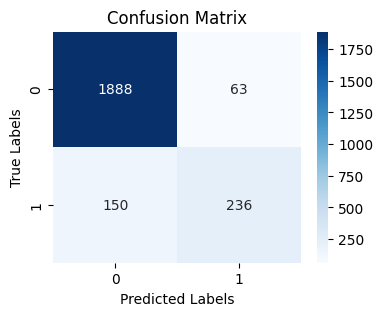

In [68]:
evaluate_binary_cnn_model(best_model_no_augm, X_test_no_augm, y_test_no_augm)

#### Evalution of model with augmentation

In [70]:
# Load the model
best_model_with_augm = load_model('models/cnn_model_with_augm.h5')

Test Loss: 0.2604
Test Accuracy: 0.8890
220/220 [==============================] - 0s 675us/step
Confusion Matrix:
[[5425  405]
 [ 373  807]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5830
           1       0.67      0.68      0.67      1180

    accuracy                           0.89      7010
   macro avg       0.80      0.81      0.80      7010
weighted avg       0.89      0.89      0.89      7010


Accuracy Score: 0.8890


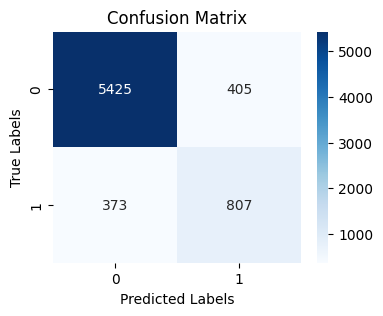

In [71]:
evaluate_binary_cnn_model(best_model_with_augm, X_test_with_augm, y_test_with_augm)

### Check for model overfitting

In [72]:
def evaluate_cnn_model_overfitting(loaded_history=None):
    
    if loaded_history:
        # Plot training & validation loss values
        plt.subplot(1, 2, 1)
        plt.plot(loaded_history['loss'])
        plt.plot(loaded_history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 2)
        plt.plot(loaded_history['accuracy'])
        plt.plot(loaded_history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        plt.tight_layout()
        plt.show()


#### Overfitting check on model without data augmentation

In [73]:
# Load the training history
with open('models/training_history_no_augm.pkl', 'rb') as f:
    loaded_history_no_augm = pickle.load(f)

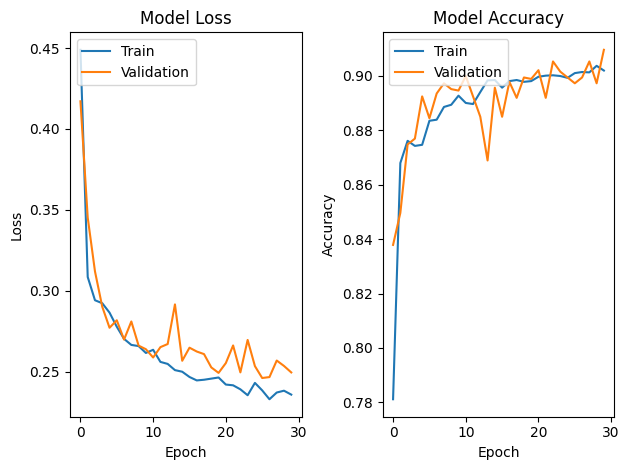

In [74]:
evaluate_cnn_model_overfitting( loaded_history_no_augm)

#### Overfitting check on model with data augmentation

In [75]:
# Load the training history
with open('models/training_history_with_augm.pkl', 'rb') as f:
    loaded_history_with_augm = pickle.load(f)


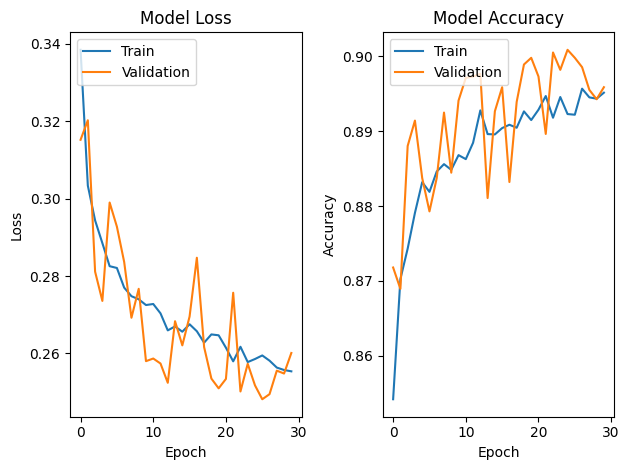

In [76]:
evaluate_cnn_model_overfitting( loaded_history_with_augm)

### Predictions

#### Prediction on data without augmentation

In [77]:
# Make predictions on the test data
predictions_prob_no_augm = best_model_no_augm.predict(X_test_no_augm)
predictions_no_augm = (predictions_prob_no_augm > 0.5).astype(int)

74/74 [==============================] - 0s 999us/step


In [78]:
flat_predictions_no_augm = predictions_no_augm.flatten()

In [80]:
df_no_augm = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_no_augm['Predicted Labels'] = flat_predictions_no_augm
df_no_augm['Actual Labels'] = y_test_no_augm

df_no_augm.head(10)

,Predicted Labels,Actual Labels
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [81]:
print("Number of right prédictions ===>", np.sum(df_no_augm['Predicted Labels']== df_no_augm['Actual Labels']))
print("Number of emotions in total" , len(df_no_augm))

Number of right prédictions ===> 2124
Number of emotions in total 2337


#### Prediction on data with augmentation

In [84]:
# Make predictions on the test data
predictions_prob_with_augm = best_model_with_augm.predict(X_test_with_augm)
predictions_with_augm = (predictions_prob_with_augm > 0.5).astype(int)

220/220 [==============================] - 0s 451us/step


In [85]:
flat_predictions_with_augm = predictions_with_augm.flatten()

In [86]:
df_with_augm = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_with_augm['Predicted Labels'] = flat_predictions_with_augm
df_with_augm['Actual Labels'] = y_test_with_augm

df_with_augm.head(10)

,Predicted Labels,Actual Labels
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [87]:
print("Number of right prédictions ===>", np.sum(df_with_augm['Predicted Labels']== df_with_augm['Actual Labels']))
print("Number of emotions in total" , len(df_with_augm))

Number of right prédictions ===> 6232
Number of emotions in total 7010


### Test of models

In [88]:
def extract_features(data, sample_rate):
    # ZCR (Zero Crossing Rate)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    # Energy
    energy = np.mean((librosa.feature.rms(y=data)).T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)

    # Spectral Spread
    spectral_spread = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0)

    # Spectral Flux
    spectral_flux = np.mean(librosa.onset.onset_strength(y=data, sr=sample_rate).T, axis=0)

    # MFCC (Mel-Frequency Cepstral Coefficients)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)

    # Chroma Vector
    chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T, axis=0)

    # Stack all features horizontally
    result = np.hstack((zcr, energy, spectral_centroid, spectral_spread, spectral_flux, mfcc, chroma))
    return result

In [89]:
def get_features(audio_path):
    # duration and offset are used to take care of the no audio in start 
    # and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(audio_path, duration=2.5, offset=0.6)
    
    result = extract_features(data, sample_rate)
    
    return result

In [93]:
def predict_binary_emotion(model, scaler, audio_test_file):
    # Extract features (assuming you have an extract_features function)
    res1 = get_features(audio_test_file)
    result = np.array(res1).reshape(1, -1)
    res = scaler.fit_transform(result)

    # Make prediction using the provided model
    prediction_prob = model.predict(res)
    predicted_label = (prediction_prob > 0.5).astype(int)

    print("Audio File is anger: ", audio_test_file)
    print("Binary CNN Prediction (Probabilities): ", prediction_prob)
    print("Binary CNN Prediction (Binary): ", predicted_label[0])

    return predicted_label[0]

#### Test on a single audio file

In [101]:
audio_file = "test_data/Savee_audios/DC_a02.wav"

In [102]:
predicted_emotions_no_augm = predict_binary_emotion(best_model_no_augm, scaler, audio_file)

1/1 [==============================] - 0s 94ms/step
Audio File is anger:  test_data/Savee_audios/DC_a02.wav
Binary CNN Prediction (Probabilities):  [[0.07166327]]
Binary CNN Prediction (Binary):  [0]


In [103]:
predicted_emotions_with_augm = predict_binary_emotion(best_model_with_augm, scaler, audio_file)

1/1 [==============================] - 0s 30ms/step
Audio File is anger:  test_data/Savee_audios/DC_a02.wav
Binary CNN Prediction (Probabilities):  [[0.97889316]]
Binary CNN Prediction (Binary):  [1]


#### Prediction on several audio files in a directory

In [104]:
def get_true_label(file_path):
    label_mapping = {
        'a': 'angry',
        'c': 'calm',
        'd': 'disgust',
        'f': 'fear',
        'h': 'happy',
        'n': 'neutral',
        'sa': 'sad',
        'su': 'surprise'
    }

    # Extract the first letter after the underscore
    file_name = os.path.basename(file_path)
    parts = file_name.split('.')[0]
    part = parts.split('_')[1]
    
    letters = [char.lower() for char in part if char.isalpha()]
    label = ''.join(letters)
    
    # Get the corresponding label from the mapping
    true_label = label_mapping[label]

    return true_label

In [105]:
file_path = "test_data/Savee_audios/DC_a01.wav"
get_true_label(file_path)

'angry'

In [106]:
def predict_binary_emotions_in_directory(model, scaler, directory_path):
    audio_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.wav')]
        
    predictions = []
    probabilities = []
    true_emotions = []

    correct_predictions = 0
    incorrect_predictions = 0

    for audio_file in audio_files:
        res1 = get_features(audio_file)
        result = np.array(res1).reshape(1, -1)
        res = scaler.fit_transform(result)
            
        # Make prediction using the provided model
        prediction_prob = model.predict(res)
        predicted_label = (prediction_prob > 0.5).astype(int)

        # Decode the predicted label (not necessary for binary classification)
        predicted_emotion = 'angry' if predicted_label[0] == 1 else 'not angry'
        
        true_label = get_true_label(audio_file)
        
        # Check if the prediction is correct
        if predicted_label[0] == 1 and true_label == 'angry':
            correct_predictions += 1
        elif predicted_label[0] == 0 and true_label != 'angry':
            correct_predictions += 1
        else:
            incorrect_predictions += 1

        # Get the probability of the predicted label
        predicted_probability = np.max(prediction_prob)

        predictions.append(predicted_emotion)
        probabilities.append(predicted_probability)
        true_emotions.append(true_label)

    total_predictions = len(audio_files)
    print(f"\nTotal Predictions: {total_predictions}")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Incorrect Predictions: {incorrect_predictions}")
        
    return predictions, true_emotions, probabilities

In [107]:
directory_path = "test_data/Savee_audios"

#### Prediction on audios without augmentation

In [108]:
predicted_labels_no_augm, true_emotions_no_augm, predicted_probabilities_no_augm = predict_binary_emotions_in_directory(best_model_no_augm, scaler, directory_path)

1/1 [==============================] - 0s 11ms/step

Total Predictions: 480
Correct Predictions: 420
Incorrect Predictions: 60


In [109]:
list_values_no_augm = list(zip(true_emotions_no_augm, predicted_labels_no_augm, predicted_probabilities_no_augm))

In [110]:
df_pred_no_augm = pd.DataFrame(list_values_no_augm, columns=['label', 'prediction', 'probability'])
df_pred_no_augm.head()

,label,prediction,probability
0,sad,not angry,0.071663
1,sad,not angry,0.071663
2,neutral,not angry,0.071663
3,surprise,not angry,0.071663
4,neutral,not angry,0.071663


In [111]:
# Assuming df_pred is your DataFrame containing predictions
confusion_matrix_no_augm = pd.crosstab(df_pred_no_augm['label'], df_pred_no_augm['prediction'], rownames=['Actual'], colnames=['Predicted'])

# Count the correct predictions for each emotion
correct_predictions_no_augm = []

for label in confusion_matrix_no_augm.index:
    try:
        correct_predictions_no_augm.append(confusion_matrix_no_augm.loc[label, label])
    except KeyError:
        correct_predictions_no_augm.append(0)

# Add a new column to your DataFrame for correct predictions
df_pred_no_augm['correct_predictions'] = np.where(df_pred_no_augm['label'] == df_pred_no_augm['prediction'], 1, 0)

# Calculate the total correct predictions for each emotion
total_correct_predictions_no_augm = df_pred_no_augm.groupby('label')['correct_predictions'].sum()


In [112]:
total_correct_predictions_no_augm

label
angry       0
disgust     0
fear        0
happy       0
neutral     0
sad         0
surprise    0
Name: correct_predictions, dtype: int64

#### Evalution of model without data augmentation

Test Loss: 0.2453
Test Accuracy: 0.9089
74/74 [==============================] - 0s 391us/step
Confusion Matrix:
[[1888   63]
 [ 150  236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1951
           1       0.79      0.61      0.69       386

    accuracy                           0.91      2337
   macro avg       0.86      0.79      0.82      2337
weighted avg       0.90      0.91      0.90      2337


Accuracy Score: 0.9089


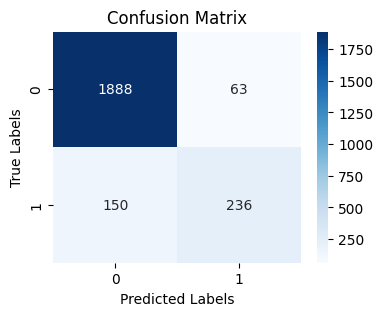

In [117]:
evaluate_binary_cnn_model(best_model_no_augm, X_test_no_augm, y_test_no_augm)

#### Prediction on data with augmentation

In [118]:
predicted_labels_with_augm, true_emotions_with_augm, predicted_probabilities_with_augm = predict_binary_emotions_in_directory(best_model_with_augm, scaler, directory_path)

1/1 [==============================] - 0s 20ms/step

Total Predictions: 480
Correct Predictions: 60
Incorrect Predictions: 420


In [119]:
list_values_with_augm = list(zip(true_emotions_with_augm, predicted_labels_with_augm, predicted_probabilities_with_augm))

In [120]:
df_pred_with_augm = pd.DataFrame(list_values_with_augm, columns=['label', 'prediction', 'probability'])
df_pred_with_augm.head()

,label,prediction,probability
0,sad,angry,0.978893
1,sad,angry,0.978893
2,neutral,angry,0.978893
3,surprise,angry,0.978893
4,neutral,angry,0.978893


In [121]:
# Assuming df_pred is your DataFrame containing predictions
confusion_matrix_with_augm = pd.crosstab(df_pred_with_augm['label'], df_pred_with_augm['prediction'], rownames=['Actual'], colnames=['Predicted'])

# Count the correct predictions for each emotion
correct_predictions_with_augm = []

for label in confusion_matrix_with_augm.index:
    try:
        correct_predictions_with_augm.append(confusion_matrix_with_augm.loc[label, label])
    except KeyError:
        correct_predictions_with_augm.append(0)

# Add a new column to your DataFrame for correct predictions
df_pred_with_augm['correct_predictions'] = np.where(df_pred_with_augm['label'] == df_pred_with_augm['prediction'], 1, 0)

# Calculate the total correct predictions for each emotion
total_correct_predictions_with_augm = df_pred_with_augm.groupby('label')['correct_predictions'].sum()


In [122]:
total_correct_predictions_with_augm

label
angry       60
disgust      0
fear         0
happy        0
neutral      0
sad          0
surprise     0
Name: correct_predictions, dtype: int64